# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
cities

Number of cities in the list: 584


['port-aux-francais',
 'margaret river',
 'pacasmayo',
 'papatowai',
 'veinticinco de mayo',
 'tocopilla',
 'albany',
 'persembe',
 'waitangi',
 'mount pearl',
 'grytviken',
 'hithadhoo',
 'petropavlovsk-kamchatsky',
 'alice springs',
 'mchinji',
 'adamstown',
 'lyantor',
 'saudarkrokur',
 'udachny',
 'tsiombe',
 'yellowknife',
 'taiohae',
 'luderitz',
 'usogorsk',
 'geneina',
 'aginskoye',
 'klyuchi',
 'nova sintra',
 'porto franco',
 'codrington',
 'enewetak',
 'boa vista',
 'avarua',
 'isafjordur',
 'badger',
 'lompoc',
 'woodmoor',
 'dudinka',
 'bouarfa',
 'talnakh',
 'bethel',
 'misratah',
 'chonchi',
 'kingscliff',
 'berezovyy',
 'murun-kuren',
 'harper',
 'west island',
 'puerto ayora',
 'annonay',
 'yuzhno-kurilsk',
 "n'zeto",
 'caleta de carquin',
 'hasaki',
 'jamestown',
 'hawaiian paradise park',
 'xining',
 'tiksi',
 'bilibino',
 'lorengau',
 'celestun',
 'inhambane',
 'brisas de zicatela',
 'west plains',
 'iqaluit',
 'atafu village',
 'pisco',
 'colonia',
 'vorgashor',
 '

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = 'https://api.openweathermap.org/data/2.5/weather?city'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=metric"
        weather_response = requests.get(query_url)

        city_weather = weather_response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["weather"][0]['main']
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | margaret river
Processing Record 3 of Set 1 | pacasmayo
Processing Record 4 of Set 1 | papatowai
Processing Record 5 of Set 1 | veinticinco de mayo
Processing Record 6 of Set 1 | tocopilla
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | persembe
Processing Record 9 of Set 1 | waitangi
Processing Record 10 of Set 1 | mount pearl
Processing Record 11 of Set 1 | grytviken
Processing Record 12 of Set 1 | hithadhoo
Processing Record 13 of Set 1 | petropavlovsk-kamchatsky
Processing Record 14 of Set 1 | alice springs
Processing Record 15 of Set 1 | mchinji
Processing Record 16 of Set 1 | adamstown
Processing Record 17 of Set 1 | lyantor
Processing Record 18 of Set 1 | saudarkrokur
Processing Record 19 of Set 1 | udachny
Processing Record 20 of Set 1 | tsiombe
Processing Record 21 of Set 1 | yellowknife
Processing Record 22 of Set 1 |

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          556
Lat           556
Lng           556
Max Temp      556
Humidity      556
Cloudiness    556
Wind Speed    556
Country       556
Date          556
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,4.16,67,Clouds,12.53,TF,1686458149
1,margaret river,-33.9500,115.0667,13.51,62,Clouds,8.98,AU,1686458150
2,pacasmayo,-7.4006,-79.5714,21.72,83,Clouds,5.84,PE,1686458150
3,papatowai,-46.5619,169.4708,9.02,83,Clouds,1.58,NZ,1686458150
4,veinticinco de mayo,-35.4323,-60.1727,3.88,74,Clear,1.34,AR,1686458150


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,4.16,67,Clouds,12.53,TF,1686458149
1,margaret river,-33.9500,115.0667,13.51,62,Clouds,8.98,AU,1686458150
2,pacasmayo,-7.4006,-79.5714,21.72,83,Clouds,5.84,PE,1686458150
3,papatowai,-46.5619,169.4708,9.02,83,Clouds,1.58,NZ,1686458150
4,veinticinco de mayo,-35.4323,-60.1727,3.88,74,Clear,1.34,AR,1686458150


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

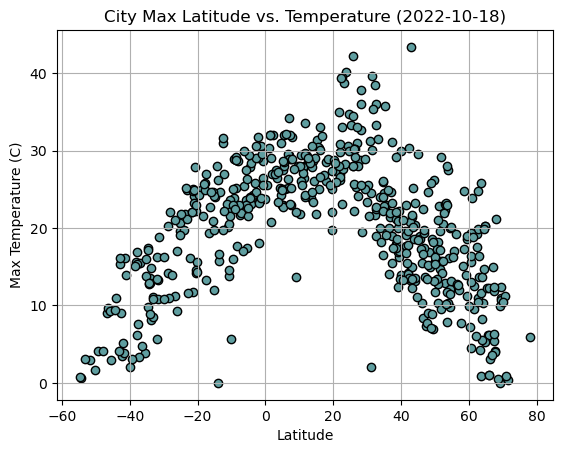

In [12]:
# Build scatter plot for latitude vs. temperature
x_axis = city_data_df['Lat']
y_axis = city_data_df['Max Temp']
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

plt.scatter(x_axis, y_axis, marker="o", color="cadetblue",edgecolors='black')
plt.grid()

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot

